In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('avocado.csv')

# Convert date to datetime and sort

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Filter for TotalUS region

In [4]:
df_us = df[df['region'] == 'TotalUS'].copy()


# Plot: Price over time

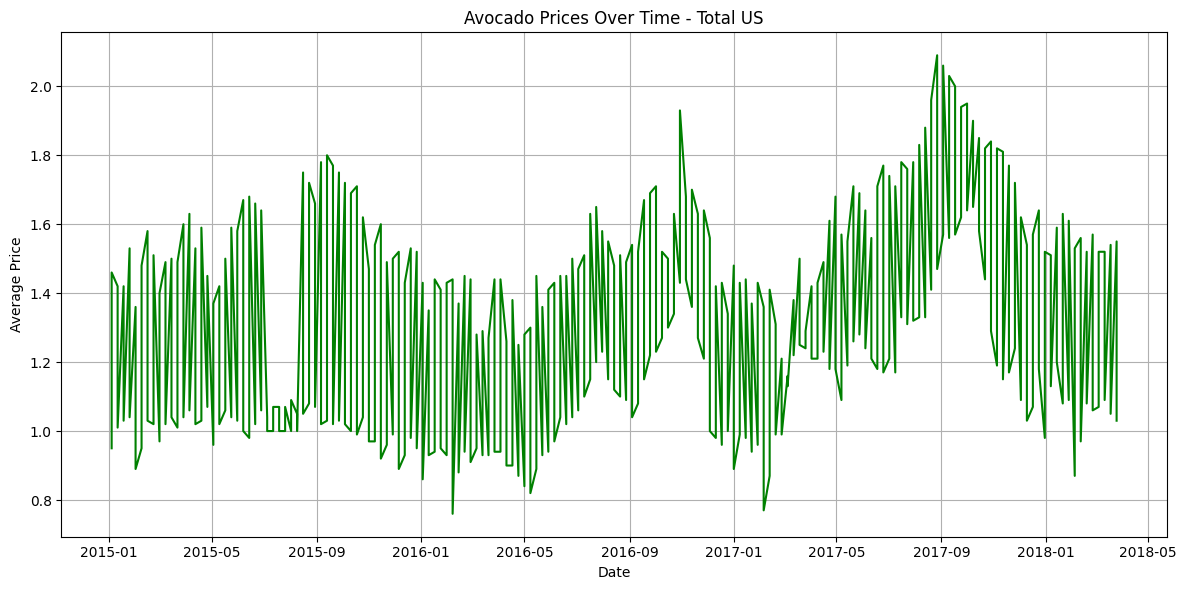

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_us['Date'], df_us['AveragePrice'], color='green')
plt.title('Avocado Prices Over Time - Total US')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Add month & year columns

In [6]:
df_us['Month'] = df_us['Date'].dt.month
df_us['Year'] = df_us['Date'].dt.year


# Monthly average price

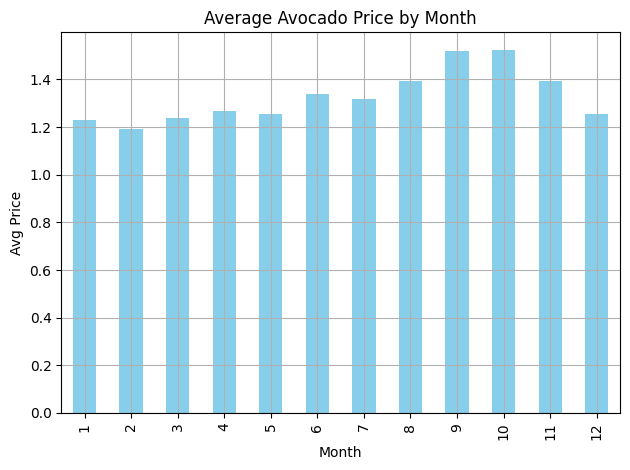

In [7]:
monthly_avg = df_us.groupby('Month')['AveragePrice'].mean()
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Avocado Price by Month')
plt.xlabel('Month')
plt.ylabel('Avg Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df_us['DateOrdinal'] = df_us['Date'].apply(lambda x: x.toordinal())


In [10]:
X = df_us[['DateOrdinal']]
y = df_us['AveragePrice']
dates = df_us['Date']


In [11]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)


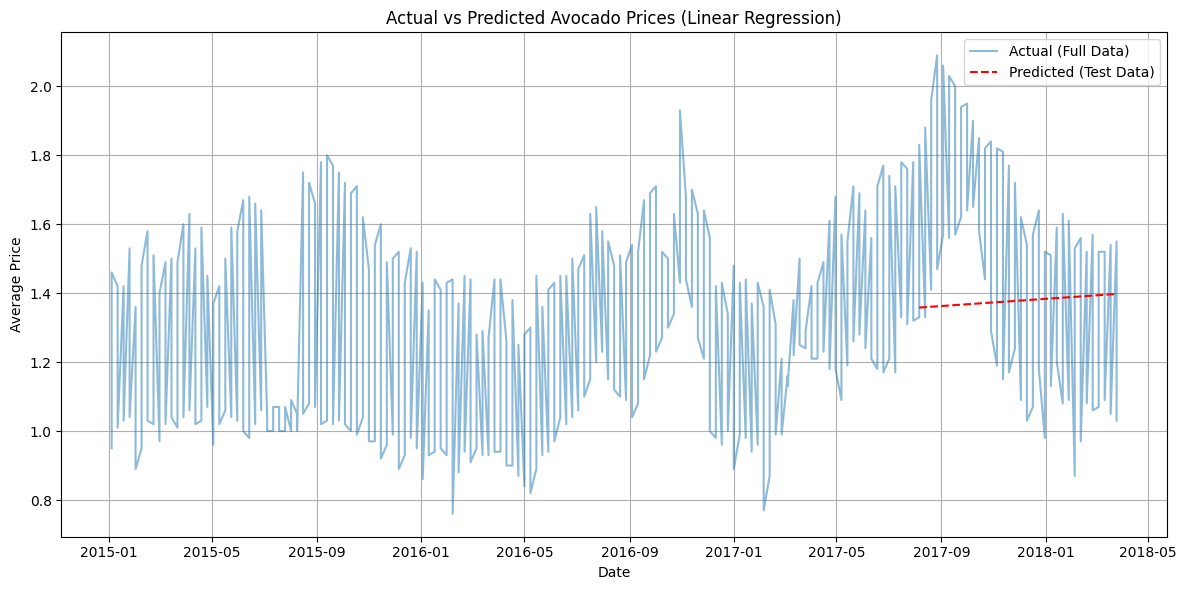

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_us['Date'], df_us['AveragePrice'], label='Actual (Full Data)', alpha=0.5)
plt.plot(dates_test, y_pred, label='Predicted (Test Data)', color='red', linestyle='--')
plt.title('Actual vs Predicted Avocado Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()